###	Processed Data Importing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
eurobank = pd.read_csv('processed_data.csv')

In [ ]:
print("\nVerifying the loaded processed data:")
eurobank.head()


Verifying the loaded processed data:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no


In [ ]:
# Necessary imports for ML model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

X = eurobank.drop('y', axis=1)
y = eurobank['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])


### Confusion Matrix

Confusion Matrix:
 [[7664   78]
 [ 280  134]]


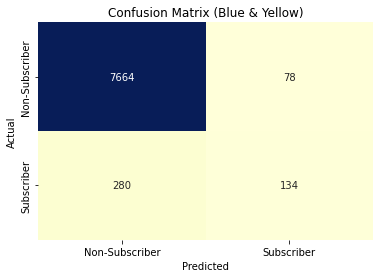

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False,
            xticklabels=['Non-Subscriber', 'Subscriber'],
            yticklabels=['Non-Subscriber', 'Subscriber'])
plt.title('Confusion Matrix (Blue & Yellow)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


### Classification Report

In [ ]:
# Classification Report
from sklearn.metrics import classification_report

print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

          no       0.96      0.99      0.98      7742
         yes       0.63      0.32      0.43       414

    accuracy                           0.96      8156
   macro avg       0.80      0.66      0.70      8156
weighted avg       0.95      0.96      0.95      8156



### Predictions on Random Samples

In [ ]:
# Make predictions on some random test data samples
sample_indices = np.random.choice(X_test.index, 5, replace=False)
sample_data = X_test.loc[sample_indices]

predictions = log_reg_pipeline.predict(sample_data)
print("\nPredictions on random samples:")
for i, idx in enumerate(sample_indices):
    print(f"Sample {i+1}:")
    print(f"Input Data: {sample_data.loc[idx]}")
    print(f"Predicted: {'Subscriber' if predictions[i] == 1 else 'Non-Subscriber'}\n")



Predictions on random samples:
Sample 1:
Input Data: age                         37
job                 management
marital                married
education          high.school
default                     no
housing                    yes
loan                        no
contact              telephone
month                      nov
day_of_week                mon
duration              3.133333
campaign                     2
pdays                      999
previous                     1
poutcome               failure
emp.var.rate              -0.1
cons.price.idx            93.2
cons.conf.idx            -42.0
euribor3m                4.191
nr.employed             5195.8
ModelPrediction       0.955695
Name: 24673, dtype: object
Predicted: Non-Subscriber

Sample 2:
Input Data: age                         35
job                blue-collar
marital                 single
education             basic.9y
default                     no
housing                    yes
loan                        no
co